# SVM: Face Recognition Application
## This notebook outlines the application of Support Vector Machine in the field of Face Recognition

## Task Requirements
- Import the required packages
- Load the dataset from sklearn.datasets fetch_lfw_people
- Explore the data
- Plot some sample images
- Import SVC
- Apply PCA to reduce the components
- Build a SVM Classifier on the reduced data
- Make a pipeline with pca and svc as stages
- Build the model
- Apply the model
- Plot the Accuracy
- Plot Classification Report
- Plot Confusion Matrix

### Import required packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

### Import fetch_lfw_people from sklearn's built-in dataset

In [2]:
from sklearn.datasets import fetch_lfw_people

### Load the faces dataset

In [3]:
faces = fetch_lfw_people(min_faces_per_person=60)

### Get the Target labels

In [4]:
print(faces.target_names)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


### Get how many samples

In [5]:
print(faces.images.shape)

(1348, 62, 47)


### Show samples

<Figure size 3600x3600 with 0 Axes>

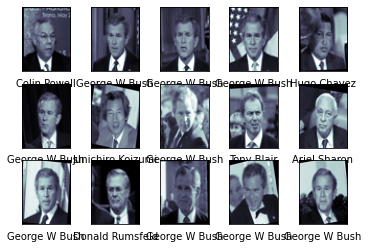

In [10]:
plt.figure(figsize=(50,50))
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

### Import SVM Classifier

In [11]:
from sklearn.svm import SVC

### Import PCA as RandomizedPCA

In [12]:
from sklearn.decomposition import PCA as RandomizedPCA

### Import pipeline

In [13]:
from sklearn.pipeline import make_pipeline

### Build a PCA model with 150 principal components

In [14]:
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)

### Build a SVM Classifier with 'rbf' kernel

In [15]:
svc = SVC(kernel='rbf', class_weight='balanced')

### Make a pipeline with pca and svc

In [16]:
model = make_pipeline(pca, svc)

### Split dataset into train and test data with random_state=42

In [17]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

### Fit the model

In [18]:
model.fit(Xtrain, ytrain)

Pipeline(steps=[('pca', PCA(n_components=150, random_state=42, whiten=True)),
                ('svc', SVC(class_weight='balanced'))])

### Predict on the testing dataset

In [19]:
yfit = model.predict(Xtest)

### Plot incorrect labels

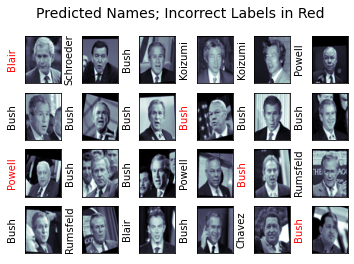

In [20]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

### Classification Report

In [21]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.82      0.60      0.69        15
     Colin Powell       0.84      0.84      0.84        68
  Donald Rumsfeld       0.76      0.61      0.68        31
    George W Bush       0.74      0.91      0.82       126
Gerhard Schroeder       0.74      0.61      0.67        23
      Hugo Chavez       1.00      0.40      0.57        20
Junichiro Koizumi       0.91      0.83      0.87        12
       Tony Blair       0.70      0.67      0.68        42

         accuracy                           0.77       337
        macro avg       0.81      0.68      0.73       337
     weighted avg       0.78      0.77      0.76       337



### Confusion Matrix

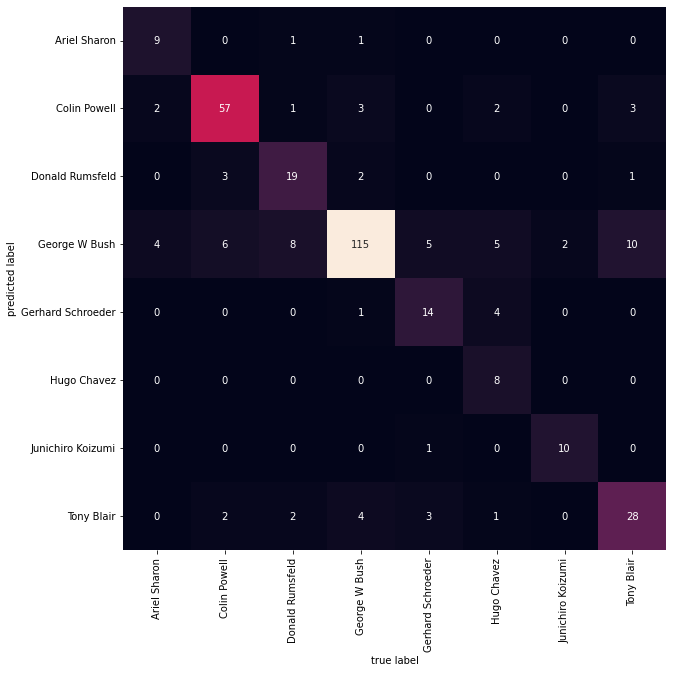

In [22]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
plt.figure(figsize=(10,10))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

### Great!!! You got some accuracy.
Now, if I ask you to do the same modeling exercise for many different hyperparameter values. You would be bored to death and it would be difficult to do it manually replacing every combination of the hyperparameter and then build a model, predict on testing dataset, plot accuracies. 

Solution: **Grid Search**

### GridSearchCV
GridSearchCV is a concept where we can try a set of our desired hyperparameter values for hyperparameters and build models with **every combination** of these hyperparameter values and **choose the best model with best hyperparameters** with the maximum accuracy.

### Import GridSearchCV

In [23]:
from sklearn.model_selection import GridSearchCV

### Set the parameter grid with desired hyperparameters and their values

In [24]:
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}


### Build the GridSearchCV model by sending the model pipeline and parameter grid

In [25]:
grid = GridSearchCV(model, param_grid)

### Fit the model

In [26]:
%time 
grid.fit(Xtrain, ytrain)

CPU times: total: 0 ns
Wall time: 0 ns


GridSearchCV(estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=150, random_state=42,
                                            whiten=True)),
                                       ('svc', SVC(class_weight='balanced'))]),
             param_grid={'svc__C': [1, 5, 10, 50],
                         'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]})

### Best Parameters

In [27]:
print(grid.best_params_)

{'svc__C': 50, 'svc__gamma': 0.005}


### Choose the best model

In [28]:
model = grid.best_estimator_

### Predict on the best chosen model with the best set of hyperparameters

In [29]:
yfit = model.predict(Xtest)

### Show some incorrectly predicted images

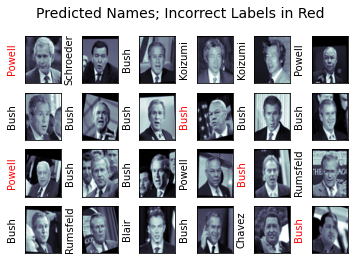

In [30]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

### Plot Classification Report

In [28]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



### Plot Confusion Matrix

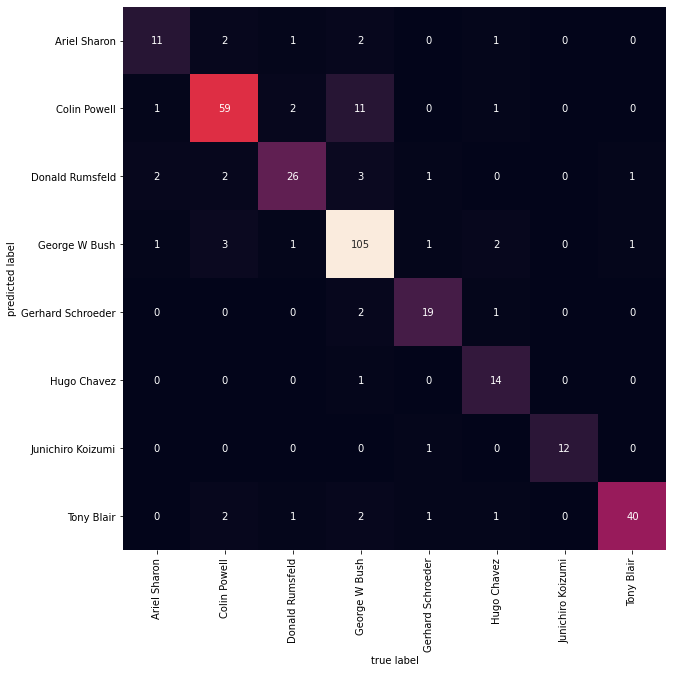

In [29]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
plt.figure(figsize=(10,10))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Is this the best model than the previous one???